In [32]:
import numpy as np
import torch
import ndjson
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import time

In [15]:
with open('data/simplified/bicycle.ndjson') as f:
    data = ndjson.load(f)

In [16]:
print(data[0])

{'word': 'bicycle', 'countrycode': 'DE', 'timestamp': '2017-03-23 12:59:36.68729 UTC', 'recognized': True, 'key_id': '6426650621247488', 'drawing': [[[1, 0, 5, 26, 52, 77, 86, 84, 79, 70, 46, 27, 15, 5, 4, 8], [145, 153, 159, 163, 152, 134, 101, 77, 71, 66, 67, 79, 95, 132, 142, 143]], [[51, 51, 43], [66, 94, 154]], [[10, 47, 84], [118, 108, 107]], [[191, 185, 184, 189, 200, 215, 235, 245, 251, 251, 245, 235, 224, 207, 187], [91, 107, 133, 147, 157, 157, 144, 134, 120, 78, 69, 66, 66, 75, 119]], [[192, 255, 255], [111, 110, 108]], [[226, 225], [59, 170]], [[54, 63, 76, 107, 129, 207, 226, 229, 229], [61, 47, 35, 28, 35, 37, 42, 46, 68]], [[188, 186], [37, 0]]]}


In [40]:
test = data[1]['drawing']

In [41]:
def combine_strokes(strokes):
    x_array = []
    y_array = []
    for i in range(len(strokes)):
        x_array += strokes[i][0]
        y_array += strokes[i][1]
        
    return [x_array, y_array]

In [42]:
# pixels = np.array(combine_strokes(test))

In [43]:
# pixels

In [44]:
# base_image = np.ones((256, 256)) 
# print(base_image)
# plt.imshow(base_image, cmap='gray')
# plt.plot()

In [45]:
# for i in range(len(pixels[0])):
#     base_image[pixels[0][i], pixels[1][i]] = 0
#     print([pixels[0][i], pixels[1][i]])
# plt.imshow(base_image, cmap='gray')
# plt.show()

In [46]:
def draw_from_strokes(strokes):
    base_img = np.ones((256, 256))
    for stroke in strokes:
        for i in range(len(stroke[0]) - 1):
            pt1 = (stroke[0][i], stroke[1][i])
            pt2 = (stroke[0][i + 1], stroke[1][i + 1])
            cv2.line(base_img, pt1, pt2, color=0, thickness=4, lineType=cv2.LINE_AA)
    return base_img

def draw_from_strokes2(strokes):
    val = 256
    plt.figure(figsize=(val/96, val/96), dpi=96)
    plt.axis('off')
    plt.xlim(0,255)
    plt.ylim(0,255)
    for stroke in strokes:
        for i in range(len(stroke[0]) - 1):
            pt1 = (stroke[0][i], stroke[1][i])
            pt2 = (stroke[0][i + 1], stroke[1][i + 1])
            x = (stroke[0][i], stroke[0][i + 1])
            y = (255 - stroke[1][i], 255 - stroke[1][i + 1])
            plt.plot(x, y, color='black', linewidth=4, marker=None)
    plt.savefig("my_img.png")
    plt.close()
    img = np.array(Image.open("my_img.png").convert('L'))
    return img / 255.
    
#     plt.show()

In [47]:
test = data[23]['drawing']
print(test)
img1 = draw_from_strokes(test)

[[[99, 95, 89, 82, 73, 59, 34, 24, 7, 1, 0, 7, 20, 37, 72, 86, 96, 107, 114, 112, 106, 98], [64, 51, 44, 39, 39, 40, 62, 79, 122, 146, 185, 199, 208, 213, 212, 205, 194, 169, 111, 67, 54, 51]], [[53, 57, 92, 108], [135, 123, 78, 53]], [[54, 98, 103, 105], [133, 136, 137, 141]], [[64, 86], [127, 202]], [[56, 40, 27], [128, 183, 212]], [[55, 9], [134, 139]], [[46, 45], [138, 37]], [[85, 216, 249], [128, 128, 121]], [[53, 88, 132], [132, 94, 10]], [[156, 163, 184, 215, 244, 254, 255], [0, 14, 40, 59, 71, 78, 82]], [[181, 193, 200, 223, 193], [41, 23, 22, 37, 41]]]


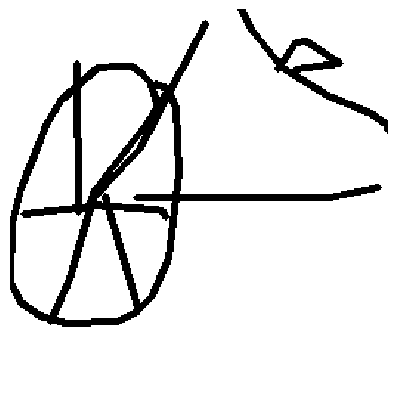

In [48]:
plt.figure(figsize=(500/96, 500/96), dpi=96)
plt.axis('off')
plt.imshow(img1, cmap='gray')
plt.show()

In [26]:
# img2 = draw_from_strokes2(test)
# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img2, cmap='gray')
# plt.show()

In [27]:
# img1 = draw_from_strokes2(test)
# img2 = draw_from_strokes(test)

# plt.figure(figsize=(500/96, 500/96), dpi=96)
# plt.axis('off')
# plt.imshow(img1-img2, cmap='gray')
# plt.show()

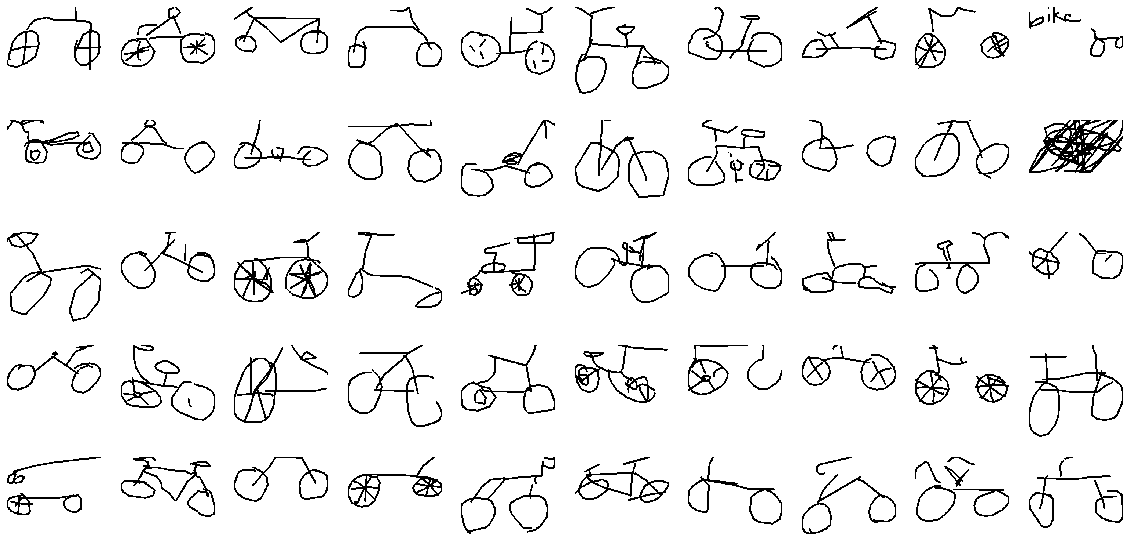

Time Elapsed: 0.04400992393493652


In [37]:
fig, axes = plt.subplots(5, 10, figsize=(20,10))
start =  time.time()
for x in range(5):
    for y in range(10):
        strokes = data[x + y * 10]['drawing']
        img = draw_from_strokes(strokes)
        axes[x, y].imshow(img, cmap='gray')
        axes[x, y].axis('off')
end = time.time()
plt.show()
print("Time Elapsed:", end - start)

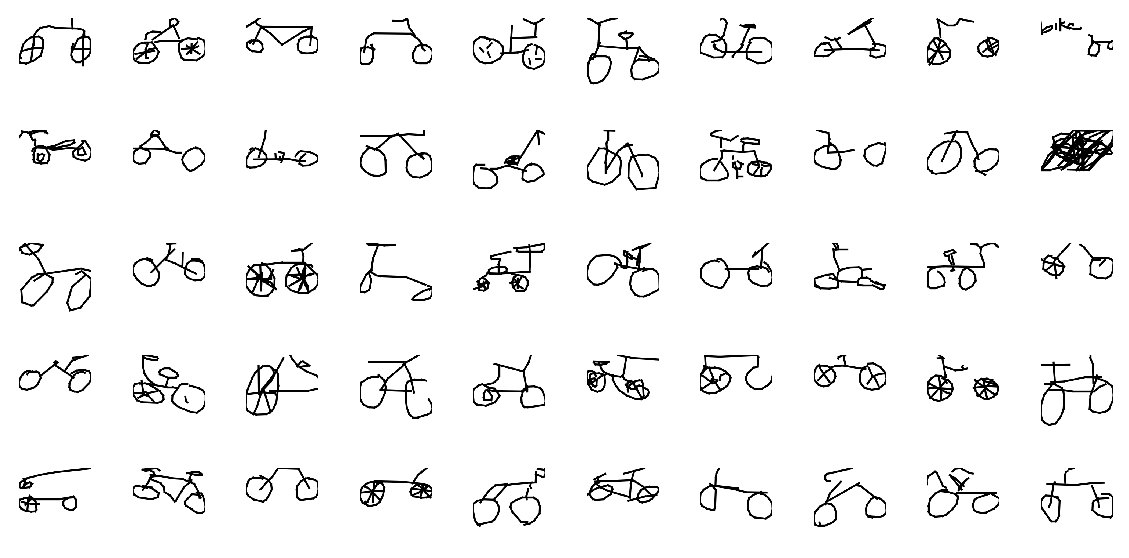

Time Elapsed: 3.7768478393554688


In [38]:
fig, axes = plt.subplots(5, 10, figsize=(20,10))
start =  time.time()
for x in range(5):
    for y in range(10):
        strokes = data[x + y * 10]['drawing']
        img = draw_from_strokes2(strokes)
        axes[x, y].imshow(img, cmap='gray')
        axes[x, y].axis('off')
end = time.time()
plt.show()
print("Time Elapsed:", end - start)